# <center>Tópicos selectos de análisis de datos<center>
# <center>Tarea 1<center>
## <center>Para entregar el 9 de septiembre de 2020<center>

Instrucciones: 
- Entrega un solo jupyter notebook por tarea. Incluye cualquier archivo, imágen, datos, etcétera, para que pueda ejecutarse. Si lo crees conveniente, puedes usar latex para los ejercicios que lo requieran.

- Usa python 3.x y tensorflow 2.x

- Todos tus archivos DEBES nombrarlos con el siguiente formato: TareaXXX_Nombre_Apellido.ipynb, TareaXXX_Nombre_Apellido.pdf, TareaXXX_Nombre_Apellido.csv, etcétera.

- Crea una carpeta con nombre TareaXXX_Nombre_Apellido donde incluirás todos tus archivos, y entrega UN SOLO archivo ZIP usando el mismo formato para el nombre: TareaXXX_Nombre_Apellido.zip

- LAS TAREAS SON INDIVIDUALES, a menos que se especifique lo contrario


1. Calcula lo siguiente:
$$ 
\begin{pmatrix} 1 & 2 \\ 
3 & 4 \end{pmatrix} 
\begin{pmatrix} 0 & 1 \\ 
2 & 3 \end{pmatrix} 
+ 
\begin{pmatrix} 7 & 9 \end{pmatrix} 
$$

Usa broadcasting de tal forma que la operación esté bien definida. Antes, averigua qué es broadcasting, en el contextos de numpy-tensorflow...

### <font color=green>Respuesta</font>


El broadcasting se refiere a la manera de tratar dos areglos de diferentes tamaños para que sean compatibles 
cuando se está realizando alguna operación con ellos. La librería Numpy tiene una función que realiza esta operación a la que se
puede accesar a través de numpy.broadcasting, aunque también es capaz de realizarlo automáticamente. 
Se muestran las dos maneras a continuación:

In [1]:
import numpy as np

a=np.array([[1,2],[3,4]])
b=np.array([[0,1],[2,3]])

c=np.dot(a,b)
c

array([[ 4,  7],
       [ 8, 15]])

In [2]:
d=np.array([7,9])
#Escribiendo explicitamente la función
broadc=np.broadcast_arrays(c,d)
#Regresa una lista con ambos vectores con las mismas dimensiones
broadc

[array([[ 4,  7],
        [ 8, 15]]), array([[7, 9],
        [7, 9]])]

In [3]:
broadc[0]+broadc[1]

array([[11, 16],
       [15, 24]])

In [4]:
#De igual manera Numpy lo hace de manera directa sin tener que especificar la función broadcast
c+d

array([[11, 16],
       [15, 24]])

In [5]:
import tensorflow as tf

In [6]:
#Con tensorflow
x = tf.constant([[1, 2],[3,4]])
y = tf.constant([[0, 1],[2,3]])
z = tf.constant([7, 9])
z2 = tf.broadcast_to(z, [2, 2])
res = tf.linalg.matmul(a,b)
res+z2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11, 16],
       [15, 24]])>

2. Las funciones  `tf.math.reduce_` de `tensorflow` reducen las dimensiones de un tensor realizando operaciones en sus elementos. Por ejemplo,
```python
x = tf.constant([[1, 1, 1], [1, 1, 1]])
tf.reduce_sum(x)
# obtenemos 6
tf.reduce_sum(x, 0)
## dará como resultado
[2, 2, 2]
```
Ahora, considera el siguiente código:
```python
a = tf.constant([[1.], [2.]])
b = tf.constant([1., 2.])
c = tf.reduce_sum(a + b)
```
¿Qué valor tendrá `c` ? Explica porqué da ése resultado.

### <font color=green>Respuesta</font>

Dado que no estamos especificando en qué eje se hará la reducción de dimensiones, lo que hará tensorflow 
es sumar todos los elementos. La primera operación que se realiza es la suma de a y b, que da como resultado un vector de 2x2,
ya que se utiliza el broadcasting y ambos arreglos son extendidos a esta dimensión: a se extiende a un arreglo con dos **1** en 
la primera fila y dos **2** en la segunda fila, b se extiende a un arreglo con otra fila idéntica a la que ya tiene. El resultado de a + b por lo tanto queda **2,3** en la primera fila y **3,4** en la segunda fila. El resultado de la operación
*tf.reduce_sum* es la suma de todos estos que es **12**.

In [7]:
a = tf.constant([[1.], [2.]])
b = tf.constant([1., 2.])
c = tf.reduce_sum(a + b)
c.numpy()

12.0

3. Considera un problema de clasificación multiclase y una red neuronal densa con una capa oculta, como se muestra en la figura 1.
<img src="fig.png" height="40%" width="40%"/>
<center> Figura 1 <center>

    
Consideraremos también el uso de la función sigmoide como activación de las unidades ocultas, la función softmax para las estimaciones en la capa de salida y cross-entropy como función de costo.

(a) Muestra que softmax es invariante a traslaciones (constantes) del vector de entrada, es decir, para cualquier vector $\mathbf{x}$ y cualquier constante $c$: 
$$
\text{softmax}(\mathbf{x}) = \text{softmax}(\mathbf{x}+c),
$$
    donde la operación $\mathbf{x}+c$ se realiza con broadcasting. Recuerda que 
$$
\text{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}}{\sum_j e^{\mathbf{x}_j}}.
$$

Lo anterior es útil cuando se escoge $c=-\max(\mathbf{x})$, es decir, quitando el valor mayor en todos los elementos de $\mathbf{x}$, para estabilidad numérica.

### <font color=green>Respuesta</font>

La invariabilidad de la función softmax ante translaciones del vector de entrada **x** se puede demostrar con álgebra simple. Sea c la  constante a sumar al vector de entrada y sabiendo que la función softmax está definida como anteriormente se presenta, entonces tenemos que para cada traslación de **x** la función se definiría de la siguiente manera:
$$
\text{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i+c}}{\sum_j e^{\mathbf{x}_j+c}}.
$$

$$
\text{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}e^{c}}{\sum_j e^{\mathbf{x}_j}e^{c}}.
$$

$$
\text{softmax}(\mathbf{x})_i = \frac{e^{c}e^{\mathbf{x}_i}}{e^{c}\sum_j e^{\mathbf{x}_j}}.
$$

$$
\text{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}}{\sum_j e^{\mathbf{x}_j}}.
$$




Esta función puede presentar problemas cuando la sumatoria de los elementos del vector de entrada tiene valores muy grandes. Si es muy negativa entonces podría ser redondeado y definido como $-\infty$ lo que haría $\mathbf{0}$ el denominador y a la función indefinida. De igual manera si es una cantidad muy grande y positiva, la función también podría quedar indefinida. Es por esto que se considera útil utilizar $c=-\max(\mathbf{x})$ dado que esto eliminará el elemento más grande del vector, haciendo que el argumento más grande pasado al exponencial sea 0 y que al menos un término en el denominador tenga valor de 1, descartando la posibilidad de que el denominador quede en $\mathbf{0}$. 

*Referencia:
Deep Learning (Ian J. Goodfellow, Yoshua Bengio and Aaron Courville), MIT Press, 2016.*

In [8]:
# Se muestra que se obtienen los mismos resultados analiticamente utilizando la traslación con c=-max(x)

def softmax_o(x):
    e_x = np.exp(x)
    return e_x/e_x.sum() 

def softmax_c(x):
    e_x = np.exp(x-np.max(x))
    return e_x/e_x.sum() 

v_test=np.array([1.4,2.6,5.1,8.9,3.6,0.1,7.5])
print(softmax_o(v_test))
print(softmax_c(v_test))

[4.33282105e-04 1.43854725e-03 1.75250932e-02 7.83392424e-01
 3.91037685e-03 1.18083149e-04 1.93182193e-01]
[4.33282105e-04 1.43854725e-03 1.75250932e-02 7.83392424e-01
 3.91037685e-03 1.18083149e-04 1.93182193e-01]


(b) Para un escalar $x$, muestra que el gradiente de la función sigmoide es $\sigma(x)(1-\sigma(x))$

### <font color=green>Respuesta</font>


Sabemos que la función sigmoide está definida por:

$$
\sigma(\mathbf{x}) = \frac{1}{1+e^{\mathbf{-x}}}.
$$

Para calcular su gradiente, utilizamos la regla de la cadena en donde 
$$
\mathbf{u}=1+e^{\mathbf{-x}}
$$

y

$$
\frac{\partial \mathbf{u}}{ \partial \mathbf{x}}=-e^{\mathbf{-x}}
$$

Por lo tanto:

$$
\frac {\partial \sigma (\mathbf{x})}{\partial \mathbf{x}}  = \frac {\partial \sigma (\mathbf{x})}{\partial \mathbf{u}} \frac {\partial \mathbf{u}}{\partial \mathbf{x}}
$$

$$
\frac {\partial \sigma (\mathbf{x})}{\partial \mathbf{x}}  = (-\mathbf{u}^{-2}) (-e^{\mathbf{-x}})
$$

$$
\frac {\partial \sigma (\mathbf{x})}{\partial \mathbf{x}}  = (-(\mathbf{1+e^{\mathbf{-x}}}))^{-2}) (-e^{\mathbf{-x}})
$$

$$
\frac {\partial \sigma (\mathbf{x})}{\partial \mathbf{x}}  = \frac{-e^{\mathbf{-x}}}{(-(\mathbf{1+e^{\mathbf{-x}}}))^{2})}
$$

$$
\frac {\partial \sigma (\mathbf{x})}{\partial \mathbf{x}}  = \frac{e^{\mathbf{-x}}}{(\mathbf{1+e^{\mathbf{-x}}})^{2})}
$$

Separando los términos tenemos:
$$
\frac {\partial \sigma (\mathbf{x})}{\partial \mathbf{x}}  = \frac{1}{(\mathbf{1+e^{\mathbf{-x}}})}\frac{e^{\mathbf{-x}}}{(\mathbf{1+e^{\mathbf{-x}}})^{2})}
$$

Reescribimos el último término de la ecuación:
$$
\frac{e^{\mathbf{-x}}}{(\mathbf{1+e^{\mathbf{-x}}}))}=1-\frac{1}{(\mathbf{1+e^{\mathbf{-x}}})}
$$
Se comprueba que:
$$
\frac {\partial \sigma (\mathbf{x})}{\partial \mathbf{x}}=\sigma(\mathbf{x})(1-\sigma(\mathbf{x}))
$$

(c) Muestra que el gradiente en la capa de salida es 
$$
    \frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{z}}=\hat{\mathbf{y}}-\mathbf{y},
$$
    donde $\hat{\mathbf{y}}=\text{softmax}(\mathbf{z})$, para algún vector $\mathbf{z}$ que proviene de la capa de salida. 
    
La función de costo, como mencionamos al inicio, es la cross-entropy: $L(\mathbf{y},{\hat{\mathbf{y}}}) = \displaystyle -\sum_i y_i\log(\hat{y}_i)$, donde $\mathbf{y}$ es un vector *one-hot* de las clases y $\hat{\mathbf{y}}$ es el vector de probabilidades estimadas.

### <font color=green>Respuesta</font>

Para obtener el gradiente en la capa de salida, es necesario utilizar la regla de la cadena para obtener la derivada de $\hat{y}$ y después la derivada parcial de la función de costo $L(\mathbf{y,\hat{y}})$. Se muestra primero la obtención  del gradiente de $\mathbf{\hat{y}}$, para lo cual es necesario derivar la función softmax que está dada por:

$$
\text{softmax}(\mathbf{z})_i = \frac{e^{\mathbf{z}_i}}{\sum_j e^{\mathbf{z}_j}}.
$$

Dado que la función softmax está dado por un cociente, utilizaremos la regla de la derivada de fracciones según la cual si:
$f(z)=\frac{g(z)}{h(z)}$, entonces:
$f'(z)=\frac{g'(z)h(z)-h'(z)g(z)}{h(z)^2}$

Por lo tanto para nuestra función tenemos:
$g(z)=e^{\mathbf{z}_i}$

$h(z)=\sum_j e^{\mathbf{z}_j}$

Las derivadas con respecto a i para nuestra primera función,$g(z)$, es sencilla ya que se obtiene con respecto a $\mathbf{z_i}$, por lo que queda igual, es decir:

$\frac{\partial e^{\mathbf{z_i}}}{\partial \mathbf{z_i}}=\mathbf{z_i}$

Sin embargo, para el caso $h(z)$, observamos que la derivada se obtiene con respecto a $\mathbf{z_i}$, mientras que el término de la sumatoria es sobre los índices j. Esto nos indica que la derivada se obtiene para dos casos: cuando $\mathbf{i}=\mathbf{j}$ y $\mathbf{i} \neq \mathbf{j}$.

En el primer caso, cuando $i=j$ tenemos que la derivada está dada por:

$\frac{\partial \frac{e^{\mathbf{z_i}}}{\sum_j e^{\mathbf{z}_j}}}{\partial z_i}=\frac{e^{\mathbf{z_i}}\sum_j e^{\mathbf{z_j}}-e^{\mathbf{z}_j}e^{\mathbf{z}_i}}{(e^{\mathbf{z}_j})^2}$

Sabemos por cómo se define el vector $\hat{y}$, que:

$\hat{y_i}=\frac{e^{\mathbf{z_i}}}{\sum_j e^{\mathbf{z_j}}}$

Entonces utilizando simple álgebra reacomodamos los términos y obtenemos para el caso $i=j$

$\frac{\partial \frac{e^{\mathbf{z_i}}}{\sum_j e^{\mathbf{z}_j}}}{\partial z_i}=\hat{y_i}(1-\hat{y_j})$

Para el caso $i \neq j$ observamos que el primer término del numerador es cero, por lo que la expresión que se obtiene es:

$\frac{\partial \frac{e^{\mathbf{z_i}}}{\sum_j e^{\mathbf{z}_j}}}{\partial z_i}=\frac{0-e^{\mathbf{z}_j}e^{\mathbf{z}_i}}{(e^{\mathbf{z}_j})^2}$


$\frac{\partial \frac{e^{\mathbf{z_i}}}{\sum_j e^{\mathbf{z}_j}}}{\partial z_i}=-\hat{y_j}y_i$

Definiendo el vector de respuesta y como un vector one-hot entonces:

$$
y=
\begin{cases}
1 \ \ \text{if} \ \ \mathbf{i=j}\\
0 \ \ \text{if} \ \ \mathbf{i \neq j}
\end{cases}
$$

Es así que tenemos que:
$\mathbf{\frac{\partial \hat{y_i}}{\partial{z_j}}=\hat{y_i}(y-\hat{y_j})}$

Ahora derivamos la expresión de la derivada de la función de Cross Entropy con respecto a z. Sabemos que la función está dada por:

$L=-\sum_i y_i log(\hat{y_i}) $

Entonces la derivada estará dada por:

$\frac{\partial L}{\partial z_i} = - \sum_k y_k \frac{\partial log(\hat{y_k})}{z_i}$
$\frac{\partial L}{\partial z_i} = - \sum_k y_k \frac{\partial log(\hat{y_k})}{z_k} \frac{\partial \hat{y_k}}{\partial z_i}$
$\frac{\partial L}{\partial z_i} = - \sum_k y_k \frac{1}{z_k} \frac{\partial \hat{y_k}}{\partial z_i}$

Utilizando el resultado obtenido del gradiente de softmax, tenemos entonces:

$\frac{\partial L}{\partial z_i} = -y_i(1-\hat{y_i}) - \sum_{k \neq i} y_k \frac{1}{z_k} (-\hat{y_k \hat{y_i}})$

$\frac{\partial L}{\partial z_i} = -y_i(1-\hat{y_i}) + \sum_{k \neq i} y_k (\hat{y_i})$

Dado que y es un vector indicador sabemos que 
$y_i+\sum_{k \neq 1}y_k = 1$

De aquí que la expresión se simplifica y obtenemos:

$\mathbf{\frac{\partial L}{\partial z}=\hat{y}-y}$


(d) Considerando los incisos anteriores, obtén las ecuaciones de backpropagation para la red neuronal, es decir, calcula
$$
    \frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{x}}.
$$
Recuerda que el paso forward calcula las activaciones: $\mathbf{h} = \sigma(\mathbf{x}\mathbf{W}_1+\mathbf{b}_1)
$ y $\hat{\mathbf{y}} = \text{softmax}(\mathbf{h}\mathbf{W}_2+\mathbf{b}_2)$.

Recuerda también que la función de activación en un vector (tensor), se aplica entrada por entrada.

### <font color=green>Respuesta</font>


El paso backpropagation nos permite ir ajustando los pesos y el sesgo del modelo, de manera que se obtengan los óptimos para realizar una clasificación adecuada. Esto se hace implementando la regla de la cadena recursivamente para obtener la ecuación dada por:
$$
    \frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{x}}.
$$

Esto es, obteniendo:

$$
\frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{x}}=\frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{z}} \frac{\partial \mathbf{z}}{\partial \mathbf{h}} \frac{\partial \mathbf{h}}{\partial \mathbf{x}}.
$$

Tenemos de acuerdo a los incisos anteriores que:

$$
\frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{z}}=\mathbf{\hat{y}-y}
$$

$$
\frac{\partial \mathbf{z}}{\partial \mathbf{h}}=\mathbf{W_2}
$$

$$
\frac{\partial \mathbf{h}}{\partial \mathbf{x}}= \frac{\partial \sigma (\mathbf{W_1x+b_1})}{\partial \mathbf{W_1x+b_1}} \frac{\partial \mathbf{W_1x+b_1}}{\partial \mathbf{x}}.
$$

$$
\frac{\partial \mathbf{h}}{\partial \mathbf{x}}= \sigma (\mathbf{W_1x+b_1})(1-\sigma (\mathbf{W_1x+b_1})) \mathbf{W_1}.
$$

Y por lo tanto:

$$
    \frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{x}}=(\mathbf{\hat{y}-y}) \ \mathbf{W_2} \ \ \sigma (\mathbf{W_1x+b_1})(1-\sigma (\mathbf{W_1x+b_1})) \ \ \mathbf{W_1}.
$$


(e) Implementa una clase `NN1HD` que entrene una red neuronal con una capa oculta como la que se muestra en la figura 1, usando los resultados de los incisos anteriores. Tu clase debe tener al menos, los métodos `train`, `predict`, que realicen las operaciones `feed_forward`, `back_propagation`, `update_weights`, etcétera, y todas las funciones que consideres necesarias (inicializar pesos, imprimir la exactitud o error, etcétera). Utiliza `numpy` para las operaciones numéricas. NO usar `sklearn`, `tensorflow` ni `keras`.

Prueba tu implementación con un conjunto de datos de 2 y 3 categorías (al menos).
Comenta tus hallazgos.

In [9]:
class NN1HD():    
    def __init__(self,max_iterations=230,learning_rate=.01):
        self.max_iterations=max_iterations
        self.learning_rate=learning_rate
    
    #def sigmoid(self,X):
        #sigma=1/(1+np.exp(-X))
        #return sigma
        
    def sigmoid(self,x):
        sig = 1 / (1 + np.exp(-x))     # Define sigmoid function
        sig = np.minimum(sig, 0.999)  # Set upper bound
        sig = np.maximum(sig, 0.001)  # Set lower bound
        sig[sig == 1.0] = 0.9999 
        sig[sig == 0.0] = 0.0001
        return sig
    
    def softmax(self,X):
        e_x = np.exp(X-np.max(X))
        return e_x/e_x.sum(axis=0) 
    
    def cross_entropy(self,Y_g,Y):
        cost=0
        for i in range(Y.shape[1]):
            temp=np.dot(Y[i,:].T,np.log(Y_g[i,:]))
            cost+=temp
        return (-1)*cost
    
    def feed_forward(self,X,y,W1,b1,W2,b2):
        u=(np.dot(X,W1.T))+b1
        h=self.sigmoid(u)
        dh=np.dot(self.sigmoid(u).T,(1-self.sigmoid(u)))
        z=np.dot(h,W2)+b2
        yg=self.softmax(z)
        cost=self.cross_entropy(yg,y)
        
        dLW1=np.dot(np.dot(np.dot(W2,dh),(yg-y).T),X)
        dLb1=np.dot(np.dot(np.dot(W2,dh),(yg-y).T),np.ones((X.shape[0])))
        dLW2=np.dot(h.T,(yg-y))
        dLb2=np.dot(np.ones((1,y.shape[0])),(yg-y))
        
        return dLW1,dLb1,dLW2,dLb2
    
    def train(self,X,y):
        #Pesos iniciales
        W1=0.002*np.random.random((y.shape[1],X.shape[1]))
        b1=np.zeros((1,y.shape[1]))
        W2=0.002*np.random.random((y.shape[1],y.shape[1]))
        b2=np.zeros((1,y.shape[1]))
        
        for i in range(self.max_iterations):
            dLW1,dLb1,dLW2,dLb2=self.feed_forward(X,y,W1,b1,W2,b2)
            
            W1= W1 - self.learning_rate*dLW1
            b1= b1 - self.learning_rate*dLb1
            W2= W2 - self.learning_rate*dLW2
            b2= b2 - self.learning_rate*dLb2
        
        self.W1=W1
        self.b1=b1
        self.W2=W2
        self.b2=b2
    
        return self
    
    def predict(self,X):
        b1=self.b1
        b2=self.b2
        W1=self.W1
        W2=self.W2
        
        u=(np.dot(X,W1.T))+b1
        u=u*(1e-11)
        h=self.sigmoid(u)
        z=np.dot(h,W2)+b2
        yg=self.softmax(z)
        
        y_pred=np.zeros((yg.shape[0]))
        for i in range(yg.shape[0]):
            temp=yg[i,:]
            y_pred[i]=np.argmax(temp)
        
        return np.array(y_pred)

#### Primer conjunto de datos (2 clases)

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X=data['data']
y=data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
#Funciones que codifican los vectores de clasificación a arreglos con cada clase como variable binaria

def to_one_hot(Y):
    Y=Y.astype(int)
    n_col = np.amax(Y) + 1
    n_col=n_col.astype(int)
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized
    
def from_one_hot(Y):
    arr=np.zeros((Y.shape[0]))
    for i in range(Y.shape[0]):
        temp=Y[i,:]
        arr[i]=np.argmax(temp)
    return arr

In [12]:
y_t=to_one_hot(y_train)

In [13]:
model=NN1HD().train(X_train,y_t)

In [14]:
yp_test=model.predict(X_test)
yp_train=model.predict(X_train)

In [15]:
error_train=0
for i in range(y_train.shape[0]):
    if y_train[i]!=yp_train[i]:
        error_train=error_train+1

error_train=(error_train/y_train.shape[0])*100
print('Error de entrenamiento')
error_train

Error de entrenamiento


13.5678391959799

In [16]:
error_test=0
for i in range(y_test.shape[0]):
    if y_test[i]!=yp_test[i]:
        error_test=error_test+1

error_test=(error_test/y_test.shape[0])*100
print('Error de prueba')
error_test

Error de prueba


12.865497076023392

#### Segundo Conjunto de datos (3 clases)

In [17]:
from sklearn.datasets import load_breast_cancer

from sklearn.datasets import load_iris
data = load_iris()

X=data['data']
y=data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
y_t=to_one_hot(y_train)

In [19]:
model2=NN1HD().train(X_train,y_t)

In [20]:
yp_test=model2.predict(X_test)
yp_train=model2.predict(X_train)

In [21]:
error_train=0
for i in range(y_train.shape[0]):
    if y_train[i]!=yp_train[i]:
        error_train=error_train+1

error_train=(error_train/y_train.shape[0])*100
print('Error de entrenamiento')
error_train

Error de entrenamiento


36.19047619047619

In [22]:
error_test=0
for i in range(y_test.shape[0]):
    if y_test[i]!=yp_test[i]:
        error_test=error_test+1

error_test=(error_test/y_test.shape[0])*100
print('Error de prueba')
error_test

Error de prueba


28.888888888888886

3. Considera los datos de dígitos MNIST. 

(a) Usando la API de keras para tensorflow (`tf.keras`), implementa un baseline basado en regresión logística (multiclase) para la clasificación de dígitos. Reporta su desempeño con las métricas que creas conveniente. Muestra el grafo computacional correspondiente, así como sus métricas, usando tensorboard. 

### <font color=green>Tu respuesta aquí</font>


In [23]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [24]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
from keras.utils import to_categorical
y_binary = to_categorical(y_train)

Using TensorFlow backend.


In [27]:
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation,Flatten
from keras.regularizers import l2
import os
import datetime
from tensorflow.keras.utils import plot_model
from IPython.display import Image

logdir = os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

#model construction
input_dim = 28*28 # imágenes de 28x28
output_dim = 10 # 10 categorías

#Baseline
keras_model = Sequential()
keras_model.add(Flatten(input_shape=(28, 28)))
keras_model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy','mse', 'mae'])

In [28]:
#training
history=keras_model.fit(x_train, y_binary, epochs=100, verbose=0,validation_split=0.2,callbacks=[tensorboard_callback])

In [29]:
print(keras_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


A continuación se muestra el grafo computacional y después la gráfica de la métrica del Accuracy Score para nuestro modelo baseline.

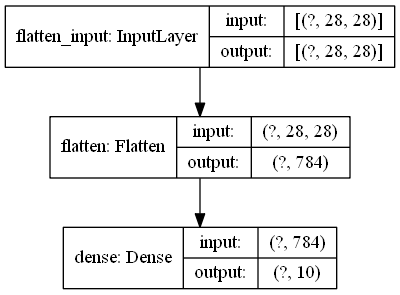

In [30]:
plot_model(keras_model, to_file='grafo.png',show_shapes=True, show_layer_names=True)

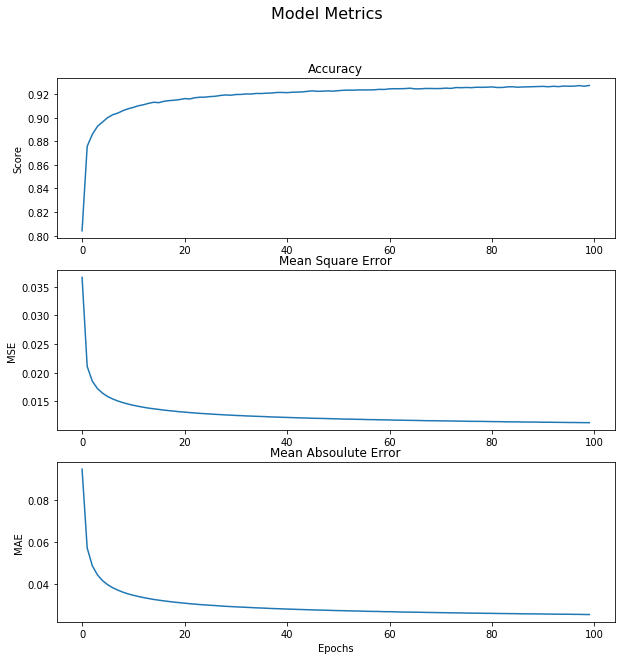

In [32]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,figsize=(10,10))
fig.suptitle('Model Metrics', fontsize=16)
axs[0].plot(history.history['accuracy'])
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Score')
axs[1].plot(history.history['mse'])
axs[1].set_title('Mean Square Error')
axs[1].set_ylabel('MSE')
axs[2].plot(history.history['mae'])
axs[2].set_title('Mean Absoulute Error')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('MAE')
plt.show()

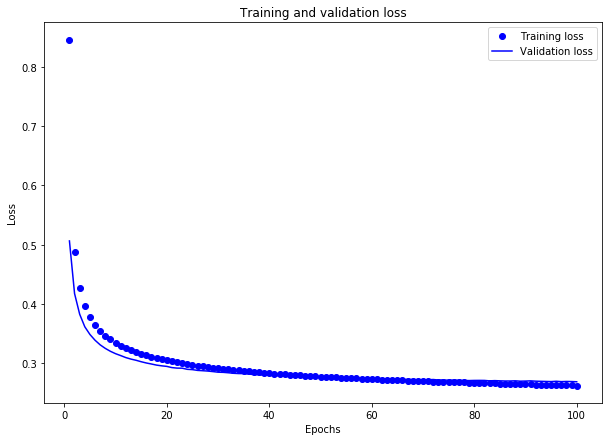

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Visualización con tensorboard

In [43]:
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}  --host localhost

Reusing TensorBoard on port 6006 (pid 13296), started 0:01:08 ago. (Use '!kill 13296' to kill it.)

El modelo baseline implementado, a pesar de solo contar con una capa oculta, logra una precisión de más del 90%. El costo/pérdida del modelo es bastante bajo y utilizando 100 epochs con el conjunto de entrenamiento también se observa un puntaje muy bajo de mean_square_error y mean_absolute_error. Contrastando la simplicidad del modelo y el bajo costo computacional que tiene comparado con otros modelos con mayor número de capas, considero que es bastante bueno para realizar esta tarea de clasificación.

(b) Nuevamente, usando la API de keras, implementa redes neuronales con 1, 2 y 3 unidades ocultas. ¿Qué mejoras obtienes en cada caso respecto al baseline? Reporta todos tus hallazgos. Usa tensorboard para mostrar el modelo y las gráficas que consideres informativas. ¿Qué modelo escogerías en éste caso y porqué?

En ambos incisos, reporta los parámetros que uses, incluyendo el número de unidades ocultas en la capa, el optimizador (uno solo para todos los modelos), el número de datos de entrenamiento, validación, batch, etcétera. SOLO UTILIZA lo que hemos visto hasta ahora.

### <font color=green>Tu respuesta aquí</font>


In [36]:
def classification_model(units):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(units, input_dim=input_dim, activation='softmax'))
    model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy','mse', 'mae'])
    return model

input_dim = 28*28 # imágenes de 28x28
output_dim = 10 # 10 categorías

keras_model1 = classification_model(1)
keras_model2 = classification_model(2)
keras_model3 = classification_model(3)
history1=keras_model1.fit(x_train, y_binary, epochs=100, verbose=0,validation_split=0.2,callbacks=[tensorboard_callback])
history2=keras_model2.fit(x_train, y_binary, epochs=100, verbose=0,validation_split=0.2,callbacks=[tensorboard_callback])
history3=keras_model3.fit(x_train, y_binary, epochs=100, verbose=0,validation_split=0.2,callbacks=[tensorboard_callback])

In [37]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(loss1) + 1)

Text(0, 0.5, 'Accuracy Score')

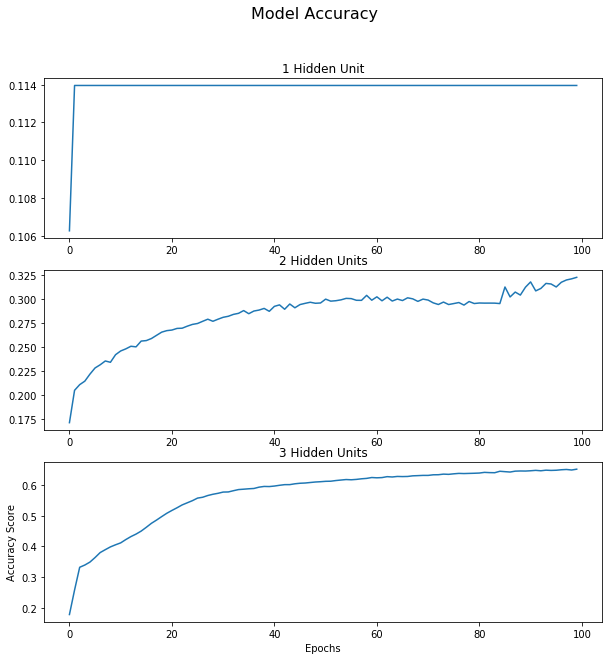

In [38]:
fig, axs = plt.subplots(3,figsize=(10,10))
fig.suptitle('Model Accuracy', fontsize=16)
axs[0].plot(history1.history['accuracy'])
axs[0].set_title('1 Hidden Unit')
axs[1].plot(history2.history['accuracy'])
axs[1].set_title('2 Hidden Units')
axs[2].plot(history3.history['accuracy'])
axs[2].set_title('3 Hidden Units')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Accuracy Score')

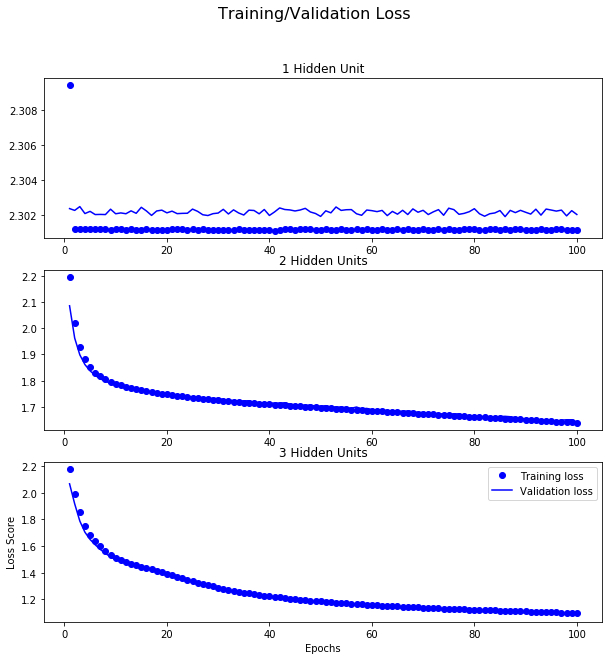

In [39]:
fig, axs = plt.subplots(3,figsize=(10,10))
fig.suptitle('Training/Validation Loss', fontsize=16)

axs[0].plot(epochs, loss1, 'bo', label='Training loss')
axs[0].plot(epochs, val_loss1, 'b', label='Validation loss')
axs[0].set_title('1 Hidden Unit')
axs[1].plot(epochs, loss2, 'bo', label='Training loss')
axs[1].plot(epochs, val_loss2, 'b', label='Validation loss')
axs[1].set_title('2 Hidden Units')
axs[2].plot(epochs, loss3, 'bo', label='Training loss')
axs[2].plot(epochs, val_loss3, 'b', label='Validation loss')
axs[2].set_title('3 Hidden Units')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Loss Score')
plt.legend()
plt.show()

Estos tres modelos no son de mucha utilidad para un conjunto de datos tan complejo como lo es MNIST, ya que al tener tan pocas unidades ocultas, no se realizan las transformaciones necesarias para hacer una clasificación multiclase adecuada. Sin embargo se puede ver claramente que el modelo con menor costo/pérdida tanto con el conjunto de entrenamiento y validación es el modelo de 3 unidades ocultas. De igual manera el accuracy score, que es bastante bajo es mejor en comparación con los otros dos para el modelo de 3 unidades ocultas. Ninguno de estos tuvo mejor rendimiento que el baseline implementado con una capa oculta densa, pero tomaron menor tiempo de cómputo debido a la simpleza significativamente mayor.